# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [62]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [63]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [64]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [65]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [66]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

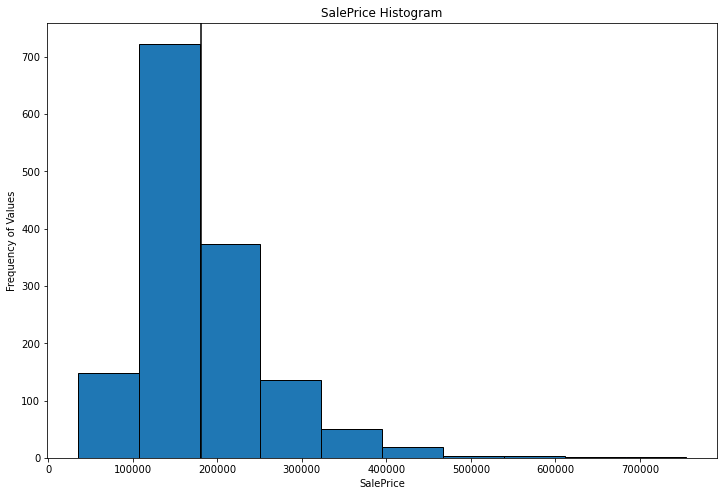

In [67]:
# Your code here
x = df['SalePrice']
mean = x.mean()

fig, ax = plt.subplots(figsize = (12,8))

ax.hist(x, edgecolor="black")

ax.set_title('SalePrice Histogram')

ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency of Values')

ax.axvline(mean, color ='black');

Now, print out the mean, median, and standard deviation:

In [68]:
print('This is the mean value:', x.mean())
print('This is the median value:',x.median())
print('This is the std value:',x.std())

This is the mean value: 180921.19589041095
This is the median value: 163000.0
This is the std value: 79442.50288288663


In the cell below, interpret the above information.

In [69]:
# Replace None with appropriate text
"""
This is a right-skewed distribution
The cost of most houses is at the median value of 163,000 as een in the histogram, where frequency is highest at >700. 
As the cost of the houses increases, the number of houses within those costs reduces. We have very few houses that cost 400,000 
and above.
"""

'\nThis is a right-skewed distribution\nThe cost of most houses is at the median value of 163,000 as een in the histogram, where frequency is highest at >700. \nAs the cost of the houses increases, the number of houses within those costs reduces. We have very few houses that cost 400,000 \nand above.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

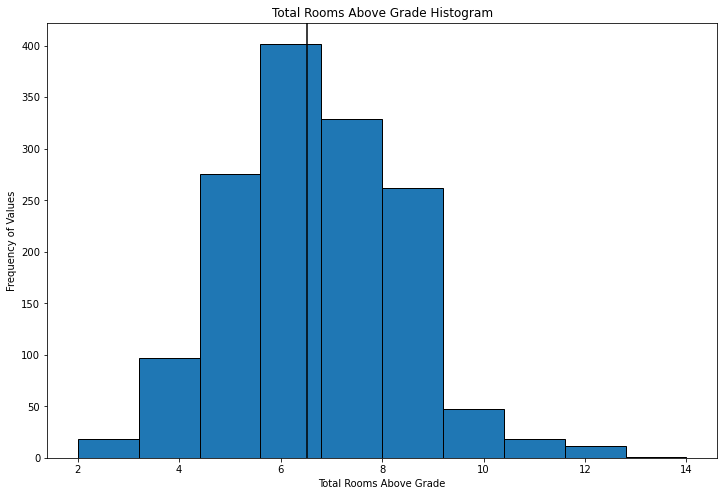

In [70]:
y = df['TotRmsAbvGrd']
mean = y.mean()

fig, ax = plt.subplots(figsize = (12,8))

ax.hist(y, edgecolor="black")

ax.set_title('Total Rooms Above Grade Histogram')

ax.set_xlabel('Total Rooms Above Grade')
ax.set_ylabel('Frequency of Values')

ax.axvline(mean, color ='black');

Now, print out the mean, median, and standard deviation:

In [71]:
print('This is the mean value:', y.mean())
print('This is the median value:',y.median())
print('This is the std value:',y.std())

This is the mean value: 6.517808219178082
This is the median value: 6.0
This is the std value: 1.625393290584064


In the cell below, interpret the above information.

In [72]:
# Replace None with appropriate text
"""
Most houses seem to have the median value of 6 total rooms as seen with the frequency of 400 in the histogram.
The mean also falls within this bracket.
"""

'\nMost houses seem to have the median value of 6 total rooms as seen with the frequency of 400 in the histogram.\nThe mean also falls within this bracket.\n'




### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

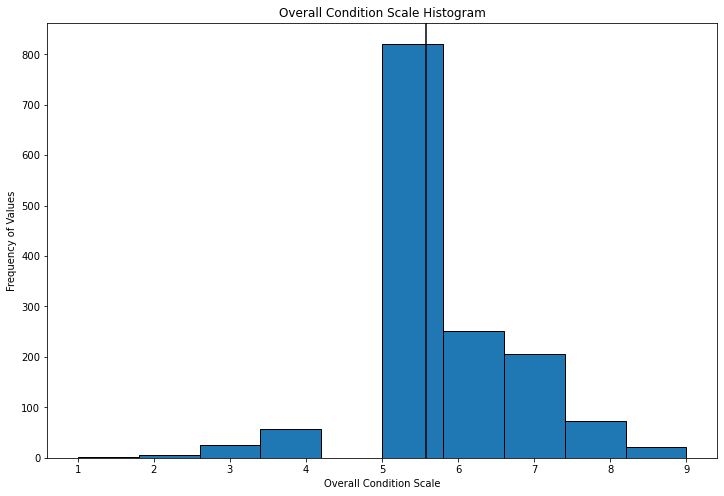

In [73]:
z = df['OverallCond']
mean = z.mean()

fig, ax = plt.subplots(figsize = (12,8))

ax.hist(z, edgecolor="black")

ax.set_title('Overall Condition Scale Histogram')

ax.set_xlabel('Overall Condition Scale')
ax.set_ylabel('Frequency of Values')

ax.axvline(mean, color ='black');

Now, print out the mean, median, and standard deviation:

In [74]:
print('This is the mean value:', z.mean())
print('This is the median value:',z.median())
print('This is the std value:',z.std())

This is the mean value: 5.575342465753424
This is the median value: 5.0
This is the std value: 1.1127993367127367


In the cell below, interpret the above information.

In [75]:
# Replace None with appropriate text
"""
This is a righ-skewed distribution
The condition of most of the houses revolves around the median and mean values of 5. Very few houses have are in the best 
condition of 8 and above. We have a few houses with poor condition, ie below 5.
"""

'\nThis is a righ-skewed distribution\nThe condition of most of the houses revolves around the median and mean values of 5. Very few houses have are in the best \ncondition of 8 and above. We have a few houses with poor condition, ie below 5.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [76]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [77]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

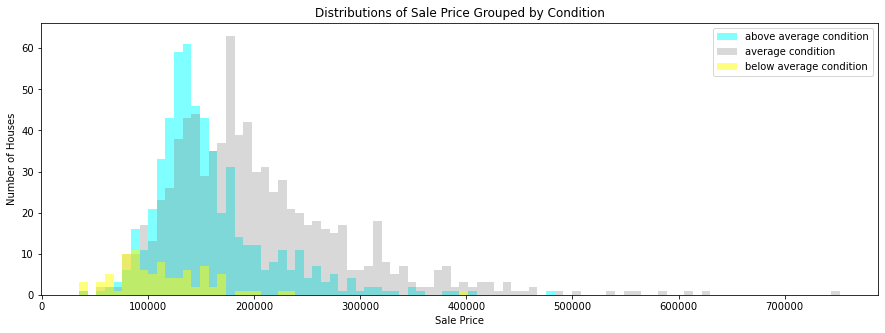

In [78]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [79]:
# Replace None with appropriate text
"""
The houses that were below average in condition, were quite few and the cost was quite low as expected. The surprising thing is
the houses that are above average in condition have a sale price that is lower than the cost of the houses in average condition.
It seems that the condition of the house doesn't necessarily affect the cost especially if the condition is average or above. 
It is also surprising to see that the most expensive houses are just average in condition.
"""

"\nThe houses that were below average in condition, were quite few and the cost was quite low as expected. The surprising thing is\nthe houses that are above average in condition have a sale price that is lower than the cost of the houses in average condition.\nIt seems that the condition of the house doesn't necessarily affect the cost especially if the condition is average or above. \nIt is also surprising to see that the most expensive houses are just average in condition.\n"

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [80]:
# Your code here
correlation_saleprice = df.corr()['SalePrice'].sort_values()
max_value = correlation_saleprice.iloc[-2]
max_column = correlation_saleprice.index[-2]

print('Most Positively Correlated Column is:', max_column)
print('Most Positively Correlated Value is:', max_value)

Most Positively Correlated Column is: OverallQual
Most Positively Correlated Value is: 0.7909816005838053


In [81]:
df['OverallQual'].head()

Id
1    7
2    6
3    7
4    7
5    8
Name: OverallQual, dtype: int64

Now, find the ***most negatively correlated*** column:

In [82]:
min_value = correlation_saleprice.iloc[0]
min_column = correlation_saleprice.index[0]

print('Most Negatively Correlated Column is:', min_column)
print('Most Negatively Correlated Value is:', min_value) 

Most Negatively Correlated Column is: KitchenAbvGr
Most Negatively Correlated Value is: -0.13590737084214105


In [83]:
df['KitchenAbvGr'].head()

Id
1    1
2    1
3    1
4    1
5    1
Name: KitchenAbvGr, dtype: int64

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

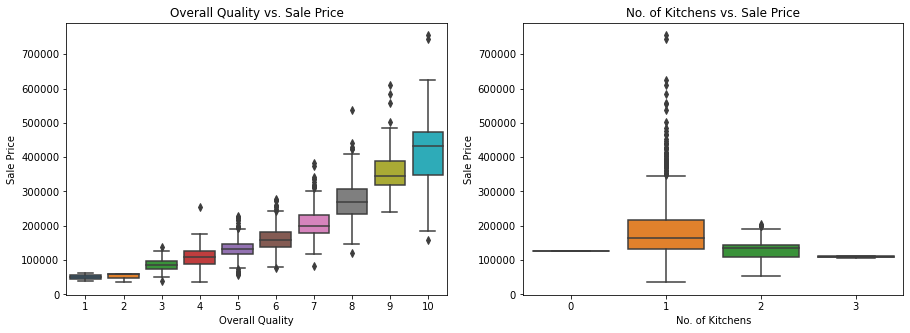

In [97]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_column] ,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs. Sale Price")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title('No. of Kitchens vs. Sale Price')
ax2.set_xlabel('No. of Kitchens')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [96]:
file_path = 'data/data_description.txt'
file_obj = open(file_path)
file_content = file_obj.readlines()

for line in file_content:
    print(line, end="")

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
# Replace None with appropriate text
"""
Overall quality of the house directly affects the cost of the house. A higher quality translates to a higher price.

It seems the most expensive houses have only 1 kitchen. The more the kithcens, the less the cost of the house which is quite 
surprising as you'd expect these houses to be the most expensive. The house with the most kitchens,3no, cost the least. 
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [98]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

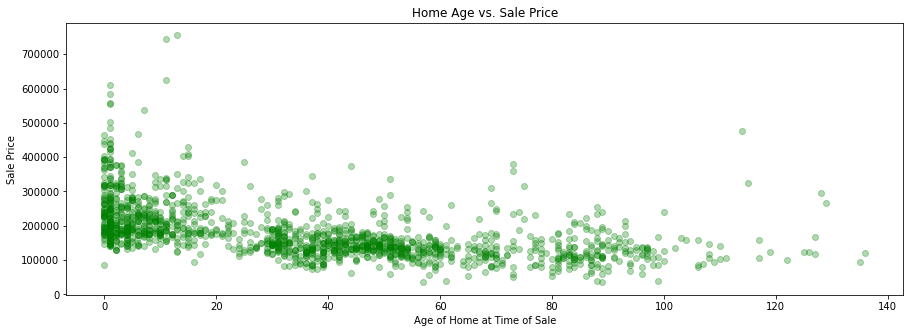

In [99]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
The age of a house directly affects its cost. As seen above, as the price of the house decreases as the age increase though we
have some exceptions but that's the general trend. We have a few outliers, where some very old houses are very expensive. Most
averagely expensive houses are quite new, falling between the ages of 0 to 20 yrs
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.